In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Libraries:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# Import data:

In [ ]:
## Nathan's path
#df = pd.read_csv("/content/steam-analysis.csv")

In [ ]:
## Sindi file path
df = pd.read_csv("/content/drive/MyDrive/Data/steam-analysis.csv")

In [ ]:
df

,UserID,Game,Action,HoursPlayed,Ratings
0,151603712,The Elder Scrolls V Skyrim,play,273.0,2
1,151603712,Fallout 4,play,87.0,4
2,151603712,Spore,play,14.9,3
3,151603712,Fallout New Vegas,play,12.1,1
4,151603712,Left 4 Dead 2,play,8.9,4
...,...,...,...,...,...
70484,128470551,Fallen Earth,play,2.4,4
70485,128470551,Magic Duels,play,2.2,4
70486,128470551,Titan Souls,play,1.5,4
70487,128470551,Grand Theft Auto Vice City,play,1.5,3


#**EDA**:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70489 entries, 0 to 70488
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UserID       70489 non-null  int64  
 1   Game         70489 non-null  object 
 2   Action       70489 non-null  object 
 3   HoursPlayed  70489 non-null  float64
 4   Ratings      70489 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.7+ MB


In [ ]:
df.describe()

,UserID,HoursPlayed,Ratings
count,7.048900e+04,70489.000000,70489.000000
mean,1.058812e+08,48.878063,3.112174
std,7.150365e+07,229.335236,1.145808
min,5.250000e+03,0.100000,1.000000
25%,4.934256e+07,1.000000,2.000000
50%,9.169067e+07,4.500000,3.000000
75%,1.556738e+08,19.100000,4.000000
max,3.099031e+08,11754.000000,5.000000


In [ ]:
# Missing Values
df.isnull().sum()

UserID         0
Game           0
Action         0
HoursPlayed    0
Ratings        0
dtype: int64

In [ ]:
df['Game'].unique()

array(['The Elder Scrolls V Skyrim', 'Fallout 4', 'Spore', ...,
       'Executive Assault', 'O.R.B.', 'MirrorMoon EP'], dtype=object)

**Histogram Ratings Distribution:**

*Interpretation:* The graph shows a slightly left-skewed distribution, which is seen as our mean is less than our median.
- The most common rating from users is 3, and the least common is 1.
- Majority of our values are between 2-4, showing it is more difficult for games to be rated a 1 or 5.
  - This could also be because of central tendency bias, a psychological bias where respondents tend to avoid extreme categories.

In [ ]:
median = np.median(df['Ratings'])
mean = np.mean(df['Ratings'])
print("Median:", median, ", Mean:", mean)

Median: 3.0 , Mean: 3.1121735306217992


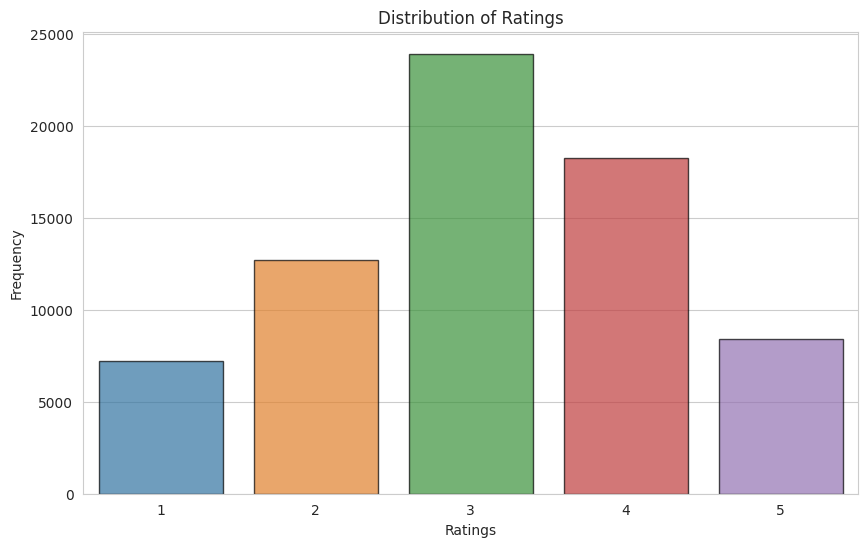

In [ ]:
sns.set_style("whitegrid")

# Distribution of the `Ratings` column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ratings', edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

**Box Plot of 'HoursPlayed' Variable**

*Interpretation:* A right-skewed distribution which entails:
* The majority or our 'typical user' plays fewer hours which is represented by the length of the box.
* We have a small number of highly engaged users who play significantly more. They can be seen as our outliers and could group them as hardcore gamers.
* The variable will either be transformed, such as with a logarithmic scale to reduce the impact of outliers, or we will choose algorithms that are less sensitive to outliers.
* Very few data points of users that have played for +8,000 hours, so those observations will be removed. We will filter users who have played only up to 8,000 hours of games.




<Axes: >

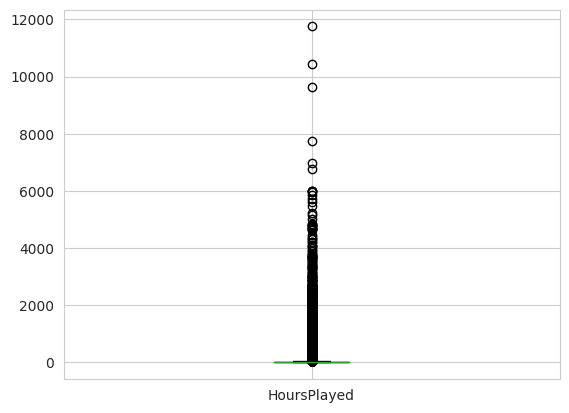

In [ ]:
df[['HoursPlayed']].boxplot()

**Interactive Plot of 'HoursPlayed' per Rating:**

*Interpretation:*
* More dense datapoints from 0 up to 2,000 hours played per each rating.
* Highest hours played is an observation of the rating 5.
* The next two highest are of rating 2 and 3, which show unusual observations if the user has spent that much time (above 8,000+ hours on a game).

In [ ]:
fig = px.strip(df, x='HoursPlayed', y=['']*len(df), color='Ratings',
               labels={'HoursPlayed': 'Hours Played', 'Ratings': 'Ratings'},
                category_orders={"Ratings": [1, 2, 3, 4, 5]})

fig.update_layout(showlegend=True,
                  title="Interactive Dot Plot for Hours",
                  yaxis=dict(title="Ratings:", showgrid=False, zeroline=False, showticklabels=False),
                  xaxis=dict(title="Hours Played"),
                  coloraxis_colorbar=dict(title="Ratings"))

fig.show()


**Average 'HoursPlayed' per Game:**

*Interpretation:*
* Half of the observations show users that spend from around 2-10 hours on average per game.
* Usual observations of average 'HoursPlayed' per Game reach up until approximately 30 hours. Values higher than than are outliers and will be considered heavy users.


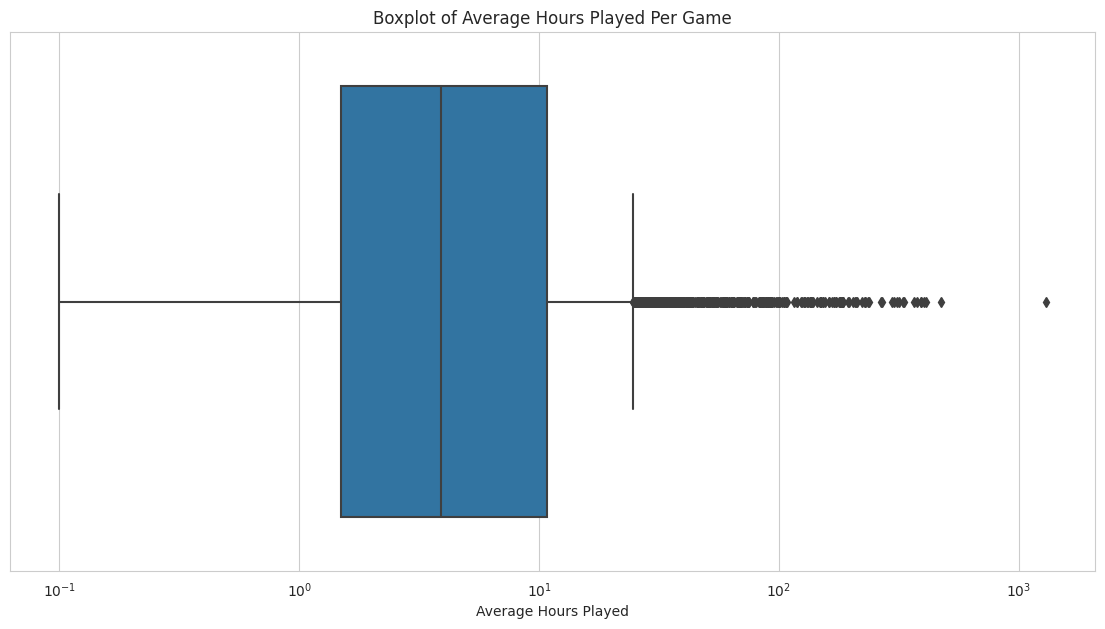

Game
Eastside Hockey Manager              1295.000000
Baldur's Gate II Enhanced Edition     475.255556
FIFA Manager 09                       411.000000
Perpetuum                             400.975000
Football Manager 2014                 391.984615
Football Manager 2012                 390.453165
Football Manager 2010                 375.048571
Football Manager 2011                 365.703226
Freaking Meatbags                     331.000000
Out of the Park Baseball 16           330.400000
Name: HoursPlayed, dtype: float64

In [ ]:
# Average number of hours played per game
average_hours_per_game = df.groupby('Game')['HoursPlayed'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
sns.boxplot(x=average_hours_per_game)
plt.title('Boxplot of Average Hours Played Per Game')
plt.xlabel('Average Hours Played')
plt.xscale('log')  # Apply log scale to x-axis for better visualization of outliers
plt.show()

average_hours_per_game.head(10)

**Average Game Time by User:**

*Interpretation:* Majority of users (more than 8000) have played games for up to approximately 500 hours. We see a significant decrease in users from 500+ hours.

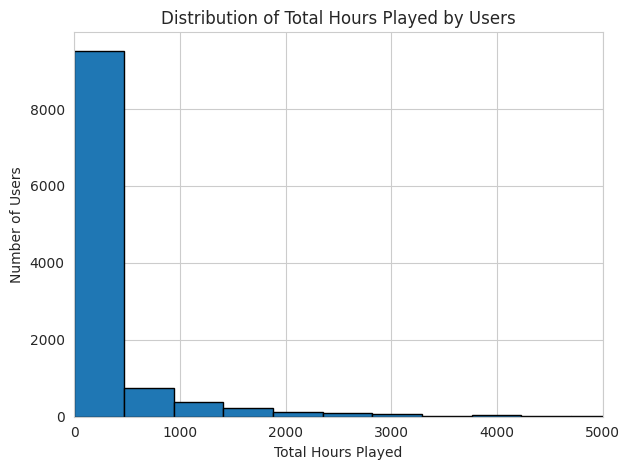

In [ ]:
total_hours_by_user = df.groupby('UserID')['HoursPlayed'].sum()

# Plotting
total_hours_by_user.plot(kind='hist', edgecolor='black', bins=25, xlim=(0, 5000))
plt.xlabel('Total Hours Played')
plt.ylabel('Number of Users')
plt.title('Distribution of Total Hours Played by Users')
plt.tight_layout()
plt.show()

**Top 10 most played games and their average rating:**

*Interpretation:* Despite the games being the most played, it seems that the average rating of all of them is around 3. This could be due to the large number of observations of the dataset.




In [ ]:
top_games = df['Game'].value_counts().head(10).index.tolist()
average_ratings = df[df['Game'].isin(top_games)].groupby('Game')['Ratings'].mean()

top_games_df = pd.DataFrame({
    'Number of Players': df['Game'].value_counts().head(10),
    'Average Rating': average_ratings
}).reset_index()

top_games_df.columns = ['Game', 'Number of Players', 'Average Rating']
top_games_df = top_games_df.sort_values(by='Number of Players', ascending=False)

top_games_df

,Game,Number of Players,Average Rating
3,Dota 2,4841,3.089857
7,Team Fortress 2,2323,3.106759
1,Counter-Strike Global Offensive,1377,3.076979
9,Unturned,1069,3.077643
5,Left 4 Dead 2,801,3.086142
2,Counter-Strike Source,715,3.146853
8,The Elder Scrolls V Skyrim,677,3.031019
4,Garry's Mod,666,3.124625
0,Counter-Strike,568,3.140845
6,Sid Meier's Civilization V,554,3.095668


**Average Rating per User by Number of Games Played:**

*Interpretation:*
* Players of only 1 game show variety in their ratings.
* We see that the more games someone has played, the more the ratings are centralized around the middle values (instead of extremes).
* We can assume that the ratings are based of users' **previous experiences**. Unless the current game is notably better or worse than what they have played before, they are more likely to rate it in the mid-range values.





In [ ]:
user_stats = df.groupby('UserID').agg(
    Total_Games=('Game', 'nunique'),
    Average_Rating=('Ratings', 'mean')
)

bin_edges = [-np.inf, 1, 5, 20, np.inf]  # -np.inf and np.inf are used to cover all possible values
bin_labels = ['1 Game', '2-5 Games', '6-20 Games', '20+ Games']

user_stats['Game_Bins'] = pd.cut(user_stats['Total_Games'], bins=bin_edges, labels=bin_labels)

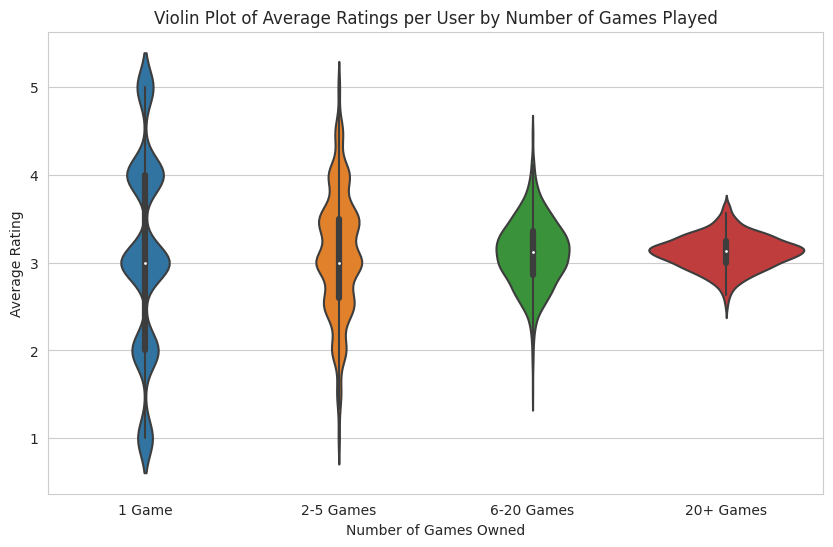

In [ ]:
bin_edges = [-np.inf, 1, 5, 20, np.inf]
bin_labels = ['1 Game', '2-5 Games', '6-20 Games', '20+ Games']
user_stats['Game_Bins'] = pd.cut(user_stats['Total_Games'], bins=bin_edges, labels=bin_labels)

plt.figure(figsize=(10, 6))
sns.violinplot(x='Game_Bins', y='Average_Rating', data=user_stats)
plt.title('Violin Plot of Average Ratings per User by Number of Games Played')
plt.xlabel('Number of Games Owned')
plt.ylabel('Average Rating')
plt.show()

# **Preprocessing**

In [ ]:
# 'HoursPlayed' variable
negative_values_count = (df['HoursPlayed'] < 0).sum()
negative_values_count

0

In [ ]:
# Removing extreme outliers of players who have played for longer than 8,000 hours
df_filtered = df[df['HoursPlayed'] <= 8000]

In [ ]:
# Logarithmic transformation of 'HoursPlayed' (dealing with outliers)
df_filtered['HoursPlayed_Log'] = np.log(df_filtered['HoursPlayed'])
df_filtered[['HoursPlayed', 'HoursPlayed_Log']].head()

<ipython-input-26-040fffcf1a21>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,HoursPlayed,HoursPlayed_Log
0,273.0,5.609472
1,87.0,4.465908
2,14.9,2.701361
3,12.1,2.493205
4,8.9,2.186051
